In [1]:
#export
import torch
import torchvision
import fastai
from fastai.vision import *
from jetbot import Camera
from exp.nb_02 import convert_bgr_to_rgb
import warnings

In [5]:
#export
warnings.filterwarnings("ignore") # turn this off during development, but otherwise it is annoying

class CaptureLearner():
    def __init__(self,path = "models", file = "simpledrive1"):
        print("loading learner, this might take a few moments")
        learn = load_learner(path = path, file = file)
        learn.model = learn.model.cuda()
        self.learn = learn
        print("done loading learner! ", f"learner classes are {learn.data.classes}")
        self.c = None
        
    def start_capture(self):
        if self.c is not None: print("Camera already running"); return
        print("starting camera")
        c = Camera()
        c.fps = 20
        c.start()
        print("camera ready")
        self.c = c
        
    def stop_camera(self):
        
        self.c.stop()
        del self.c
        
    def show_image(self):
        img = convert_bgr_to_rgb(self.c.value).astype('uint8')
        plt.imshow(img)
        
    def CaptureImage_Fastai(self):
        img = convert_bgr_to_rgb(self.c.value).astype('uint8')
        imgTensor = torch.Tensor(img)
        imgTensor2 = imgTensor.transpose(0,2)
        imgTensor2 = imgTensor2.transpose(1,2) # not sure why I need this
        imgfai = Image(imgTensor2/255)
        return imgfai
    
    def InferenceCapture(self):
        imgfai = self.CaptureImage_Fastai()
        r = self.learn.predict(imgfai)
        return r[0].obj, r
        
        

In [6]:
cl = CaptureLearner()

loading learner, this might take a few moments
done loading learner!  learner classes are ['left', 'right', 'up']


In [7]:
cl.start_capture()

starting camera
camera ready


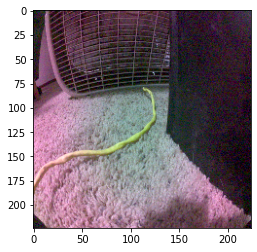

In [8]:
cl.show_image()

In [10]:
cl.InferenceCapture()

('up', (Category tensor(2), tensor(2), tensor([0.1019, 0.2800, 0.6181])))

In [11]:
%timeit -n 10 _=cl.InferenceCapture()

62.3 ms ± 3.24 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [12]:
cl.stop_camera()